# Capstone Notebook 2

**==========================================================================================================**

## Project Description

In this peer reviewed assignment, you’ll use a real-world Boston housing dataset and step-by-step Principal Component Analysis (PCA) to reduce the dimension of a large data set without losing important information necessary for quality analysis.  Then, you’ll run a linear regression model and interpret your results. 

You’ll evaluate your model’s performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), and the Root Mean Squared Error (RMSE).

Completing the tasks in the Capstone will allow you to understand how and why we use PCA on datasets and give you insight into the linear algebra that lies behind PCA. You’ll also understand how to set up, run, and interpret a linear regression model.

**==========================================================================================================**

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import random

import datetime
from datetime import datetime, timedelta, date


import statsmodels as st
from statsmodels.multivariate.pca import PCA
import statsmodels.api as sm

from collections import Counter

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set(style='darkgrid', font_scale=1.2)
plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

#from sklearn.preprocessing import StandardScaler, MinMaxScaler


from sklearn.metrics import silhouette_score


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None )
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


**==========================================================================================================**

## Exploratory Data Analysis

In [2]:
df = pd.read_csv("housingscaled.csv")

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.42,0.28,-1.29,-0.27,-0.14,0.41,-0.12,0.14,-0.98,-0.67,-1.46,0.44,-1.08,24.00
1,-0.42,-0.49,-0.59,-0.27,-0.74,0.19,0.37,0.56,-0.87,-0.99,-0.30,0.44,-0.49,21.60
2,-0.42,-0.49,-0.59,-0.27,-0.74,1.28,-0.27,0.56,-0.87,-0.99,-0.30,0.40,-1.21,34.70
3,-0.42,-0.49,-1.31,-0.27,-0.84,1.02,-0.81,1.08,-0.75,-1.11,0.11,0.42,-1.36,33.40
4,-0.41,-0.49,-1.31,-0.27,-0.84,1.23,-0.51,1.08,-0.75,-1.11,0.11,0.44,-1.03,36.20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,22.53
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,9.20
min,-0.42,-0.49,-1.56,-0.27,-1.47,-3.88,-2.34,-1.27,-0.98,-1.31,-2.71,-3.91,-1.53,5.00
25%,-0.41,-0.49,-0.87,-0.27,-0.91,-0.57,-0.84,-0.81,-0.64,-0.77,-0.49,0.21,-0.80,17.02
50%,-0.39,-0.49,-0.21,-0.27,-0.14,-0.11,0.32,-0.28,-0.52,-0.46,0.27,0.38,-0.18,21.20
75%,0.01,0.05,1.02,-0.27,0.60,0.48,0.91,0.66,1.66,1.53,0.81,0.43,0.60,25.00
max,9.93,3.80,2.42,3.67,2.73,3.56,1.12,3.96,1.66,1.80,1.64,0.44,3.55,50.00


In [6]:
df.shape

(506, 14)

In [7]:
X = df.iloc[:, 0:13]

In [8]:
y = df.iloc[:, 13]

In [9]:
X.values, y.values

(array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
          0.44105193, -1.0755623 ],
        [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
          0.44105193, -0.49243937],
        [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
          0.39642699, -1.2087274 ],
        ...,
        [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
          0.44105193, -0.98304761],
        [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
          0.4032249 , -0.86530163],
        [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
          0.44105193, -0.66905833]]),
 array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
   

**==========================================================================================================**

# Principal Component Analysis (PCA) - StatsModels

In [10]:
# Calculate the covariance matrix
cov_matrix = np.cov(X, rowvar=False)
cov_matrix

array([[ 1.0019802 , -0.20086619,  0.40738853, -0.05600226,  0.42180532,
        -0.21968085,  0.35343273, -0.38042191,  0.62674377,  0.5839183 ,
         0.29051973, -0.38582644,  0.4565237 ],
       [-0.20086619,  1.0019802 , -0.53488527, -0.04278127, -0.51762669,
         0.31260839, -0.57066514,  0.66572388, -0.31256554, -0.31518622,
        -0.39245415,  0.17586788, -0.41381239],
       [ 0.40738853, -0.53488527,  1.0019802 ,  0.06306266,  0.76516363,
        -0.39245145,  0.6460553 , -0.70942902,  0.59630775,  0.72218743,
         0.38400646, -0.35768342,  0.60499536],
       [-0.05600226, -0.04278127,  0.06306266,  1.0019802 ,  0.09138341,
         0.09143192,  0.0866891 , -0.09937217, -0.00738283, -0.03565699,
        -0.1217558 ,  0.0488851 , -0.05403609],
       [ 0.42180532, -0.51762669,  0.76516363,  0.09138341,  1.0019802 ,
        -0.30278658,  0.73291856, -0.77075334,  0.61265134,  0.66934602,
         0.1893068 , -0.38080321,  0.59204898],
       [-0.21968085,  0.312608

In [11]:
# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [12]:
eigenvalues

array([6.1389812 , 1.43611329, 1.2450773 , 0.85927328, 0.83646904,
       0.65870897, 0.5364162 , 0.39688167, 0.06363502, 0.27749173,
       0.16963823, 0.18638271, 0.22067394])

In [13]:
eigenvectors

array([[-0.2509514 ,  0.31525237, -0.24656649, -0.06177071,  0.08215692,
         0.21965961, -0.77760721, -0.15335048, -0.0459523 , -0.26039028,
         0.08676107,  0.10964435, -0.01936913],
       [ 0.25631454,  0.3233129 , -0.29585782, -0.12871159,  0.32061699,
         0.3233881 ,  0.27499628,  0.40268031,  0.08091897, -0.35813749,
        -0.07142528, -0.26275629, -0.26752723],
       [-0.34667207, -0.11249291,  0.01594592, -0.01714571, -0.00781119,
         0.0761379 ,  0.33957645, -0.17393172,  0.25107654, -0.64441615,
        -0.11319963,  0.30316943,  0.36353226],
       [-0.00504243, -0.45482914, -0.28978082, -0.81594136,  0.08653094,
        -0.16749014, -0.07413621,  0.02466215, -0.03592171,  0.01372777,
        -0.00398268, -0.01392667,  0.00618184],
       [-0.34285231, -0.21911553, -0.12096411,  0.12822614,  0.13685356,
         0.15298267,  0.19963484, -0.08012056, -0.04363045,  0.01852201,
         0.80432257, -0.11131888, -0.23105645],
       [ 0.18924257, -0.149331

In [14]:
# Determine the optimal number of features
optimal_num_features = np.sum(eigenvalues >= 1)

print("Optimal number of features:", optimal_num_features)

Optimal number of features: 3


In [15]:
# Number of features to retain based on Kaiser's Stopping Rule or any other criteria
num_features_to_retain = 3

# Select the first 'num_features_to_retain' eigenvectors as the retained eigenvectors
retained_eigenvectors = eigenvectors[:, :num_features_to_retain]

# Construct the projection matrix
projection_matrix = retained_eigenvectors

In [16]:
projection_matrix

array([[-0.2509514 ,  0.31525237, -0.24656649],
       [ 0.25631454,  0.3233129 , -0.29585782],
       [-0.34667207, -0.11249291,  0.01594592],
       [-0.00504243, -0.45482914, -0.28978082],
       [-0.34285231, -0.21911553, -0.12096411],
       [ 0.18924257, -0.14933154, -0.59396117],
       [-0.3136706 , -0.31197778,  0.01767481],
       [ 0.32154387,  0.34907   ,  0.04973627],
       [-0.31979277,  0.27152094, -0.28725483],
       [-0.33846915,  0.23945365, -0.22074447],
       [-0.20494226,  0.30589695,  0.32344627],
       [ 0.20297261, -0.23855944,  0.3001459 ],
       [-0.30975984,  0.07432203,  0.26700025]])

In [17]:
#Write the projection matrix as a data frame

projmatrixdf = pd.DataFrame(projection_matrix)

projmatrixdf

,0,1,2
0,-0.25,0.32,-0.25
1,0.26,0.32,-0.30
2,-0.35,-0.11,0.02
3,-0.01,-0.45,-0.29
4,-0.34,-0.22,-0.12
5,0.19,-0.15,-0.59
6,-0.31,-0.31,0.02
7,0.32,0.35,0.05
8,-0.32,0.27,-0.29
9,-0.34,0.24,-0.22


In [18]:
# Perform PCA
pca = PCA(data=X,
    ncomp=3,
    standardize=False,
    demean=False,
    normalize=True,
    gls=False,
    weights=None,
    method='svd')


In [19]:
pca

Principal Component Analysis(nobs: 506, nvar: 13, transformation: None, normalization: True, number of components: 3, SVD, id: 0x242670ef5b0)

In [20]:
projmatrixdf.shape

(13, 3)

In [21]:
# Access the principal components
principal_components = pca.factors
principal_components

,comp_0,comp_1,comp_2
0,-0.04,0.03,0.01
1,-0.03,0.02,-0.03
2,-0.04,0.02,0.01
3,-0.05,-0.00,-0.00
4,-0.04,0.00,-0.00
...,...,...,...
501,-0.01,0.03,-0.03
502,-0.00,0.03,-0.05
503,-0.01,0.04,-0.02
504,-0.00,0.04,-0.02


In [22]:
# Access the variance explained by each component
explained_variance = pca.eigenvals / np.sum(pca.eigenvals)
explained_variance

0   0.70
1   0.16
2   0.14
Name: eigenvals, dtype: float64

In [23]:
# Calculate the sum of the explained variance ratio
sum_explained_variance_ratio = np.sum(explained_variance)
sum_explained_variance_ratio

1.0

In [24]:
# Access the loadings (correlation coefficients between original features and components)
loadings = pca.loadings
loadings

,comp_0,comp_1,comp_2
CRIM,0.25,-0.32,0.25
ZN,-0.26,-0.32,0.30
INDUS,0.35,0.11,-0.02
CHAS,0.01,0.45,0.29
NOX,0.34,0.22,0.12
RM,-0.19,0.15,0.59
AGE,0.31,0.31,-0.02
DIS,-0.32,-0.35,-0.05
RAD,0.32,-0.27,0.29
TAX,0.34,-0.24,0.22


In [25]:
pca.rsquare

ncomp
0   0.00
1   0.47
2   0.58
3   0.68
Name: rsquare, dtype: float64

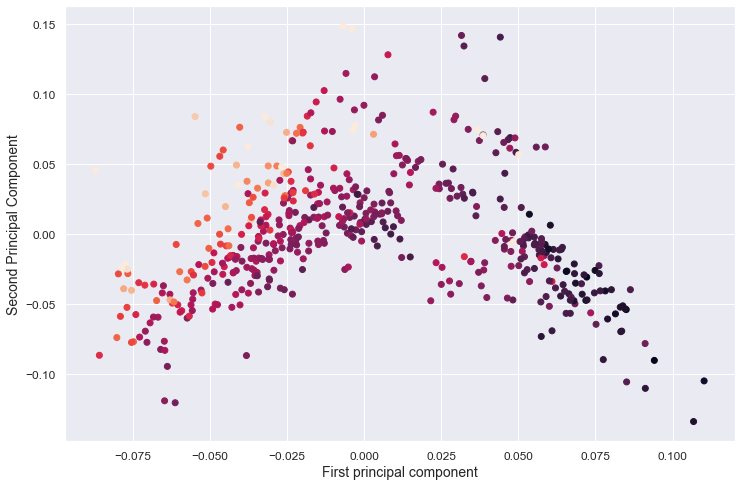

In [26]:
plt.figure(figsize=(12,8))
plt.scatter(principal_components["comp_0"],principal_components["comp_1"], c=y)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

plt.show()

**==========================================================================================================**

#### Python code done by Dennis Lam